**Topic Modeling in Python**
Its a method to extract hidden topics from a document/corpus and label certain parts of it. This helps to segment a document to certain topics for different users. It is helpful for summarization, improving customer support, SEO and many more.

In [0]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [0]:
# data load function

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [26]:
topic_test=load_data("/content/","topic.txt")

Total Number of Documents: 515


In [27]:
topic_test

(["Barclays' defiance of US fines has merit Barclays disgraced itself in many ways during the pre-financial crisis boom years. So it is tempting to think the bank, when asked by US Department of Justice to pay a large bill for polluting the financial system with mortgage junk between 2005 and 2007, should cough up, apologise and learn some humility. That is not the view of the chief executive, Jes Staley. Barclays thinks the DoJâ€™s claims are â€œdisconnected from the factsâ€\x9d and that it has â€œan obligation to our shareholders, customers, clients and employees to defend ourselves against unreasonable allegations and demands.â€\x9d The stance is possibly foolhardy, since going into open legal battle with the most powerful US prosecutor is risky, especially if you end up losing. But actually, some grudging respect for Staley and Barclays is in order. The US system for dishing out fines to errant banks for their mortgage sins has come to resemble a casino. The approach prefers settle

In [0]:
# pre-process data by tokenize, remove stop words and stemming

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = ''.join(i).lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
tests_clean=preprocess_data(topic_test)

In [0]:
# document term matrix and dictionary of terms

def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [0]:
dictionary,doc_term_matrix=prepare_corpus(tests_clean)

In [42]:
doc_term_matrix

[[(0, 213),
  (1, 10),
  (2, 305),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 3),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 3),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 4),
  (29, 2),
  (30, 445),
  (31, 274),
  (32, 98),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 15),
  (37, 1),
  (38, 4),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 2),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 2),
  (51, 2),
  (52, 9),
  (53, 1),
  (54, 14),
  (55, 1),
  (56, 12),
  (57, 5),
  (58, 126),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 6),
  (67, 1),
  (68, 2),
  (69, 2),
  (70, 6),
  (71, 1),
  (72, 5),
  (73, 2),
  (74, 5),
  (75, 96),
  (76, 4),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 6),
  (81, 10),
  (82, 3),
  (83, 3),
  (84, 2),
  (85, 3),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 66),
  

In [0]:
# lsa model

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [47]:
create_gensim_lsa_model(tests_clean,10,50)

[(0, '0.823*"â" + 0.141*"said" + 0.097*"would" + 0.093*"one" + 0.091*"year" + 0.086*"trump" + 0.079*"say" + 0.078*"time" + 0.077*"like" + 0.074*"peopl" + 0.066*"new" + 0.064*"also" + 0.063*"us" + 0.062*"bank" + 0.060*"make" + 0.060*"itâ" + 0.060*"work" + 0.057*"could" + 0.054*"get" + 0.054*"go" + 0.052*"first" + 0.049*"last" + 0.049*"vote" + 0.046*"campaign" + 0.046*"back" + 0.046*"two" + 0.045*"eu" + 0.043*"take" + 0.043*"need" + 0.042*"film" + 0.042*"uk" + 0.042*"day" + 0.040*"way" + 0.039*"come" + 0.039*"even" + 0.039*"may" + 0.038*"govern" + 0.038*"support" + 0.038*"want" + 0.038*"use" + 0.037*"look" + 0.037*"call" + 0.037*"think" + 0.036*"play" + 0.036*"right" + 0.036*"point" + 0.036*"mani" + 0.035*"leav" + 0.034*"elect" + 0.034*"1"')]


In [0]:
# generate number of topics from coherence scores

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [0]:
number_of_topics=5
model_list,coherence_values=compute_coherence_values(dictionary,doc_term_matrix,tests_clean,10,1,2)

In [53]:
coherence_values

[0.23908261757495392,
 0.23908261757495392,
 0.23908261757495392,
 0.23908261757495392,
 0.23908261757495392]

In [0]:
# plot coherence score values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

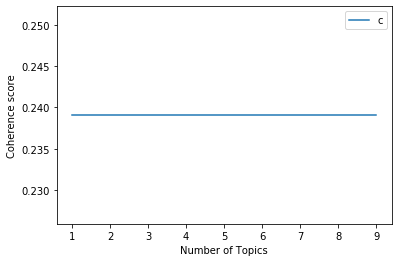

In [55]:
plot_graph(tests_clean,1,10,1)

In [56]:
# lsa model

# LSA Model
number_of_topics=7
words=10
document_list,titles=load_data("","topic.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 515
[(0, '0.816*"â" + 0.147*"trump" + 0.144*"said" + 0.115*"say" + 0.087*"would" + 0.086*"vote" + 0.083*"one" + 0.081*"peopl" + 0.081*"year" + 0.072*"campaign"'), (1, '-0.446*"trump" + 0.198*"say" + 0.186*"hammond" + 0.185*"year" + -0.177*"presid" + 0.167*"statement" + 0.152*"brexit" + 0.143*"govern" + -0.143*"â" + 0.138*"autumn"'), (2, '0.356*"poll" + 0.355*"vote" + -0.226*"trump" + 0.215*"remain" + 0.185*"leav" + -0.185*"statement" + -0.175*"hammond" + 0.168*"station" + -0.160*"say" + 0.134*"referendum"'), (3, '0.418*"trump" + -0.368*"â" + 0.226*"elect" + 0.226*"presid" + 0.217*"vote" + 0.187*"poll" + 0.127*"eu" + 0.126*"campaign" + 0.124*"remain" + 0.118*"obama"'), (4, '-0.319*"min" + -0.284*"0" + -0.223*"1" + -0.175*"leagu" + 0.169*"â" + -0.168*"goal" + -0.158*"2" + -0.142*"play" + -0.131*"ball" + -0.129*"citi"'), (5, '0.182*"said" + 0.179*"work" + -0.179*"clinton" + 0.178*"doctor" + 0.176*"bank" + 0.166*"would" + -0.160*"poll" + 0.146*"presid" + -0.146*"

In [0]:
cd

/root
